In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('mortgage_covenant_data.csv')

df.head()

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
0,2023,2.703706e+10,Race Not Available,6,185000.0,195000.0,NaN,6.125,40.37,73.48,10,0.0,False,NaN
1,2023,2.714103e+10,Race Not Available,6,375000.0,385000.0,NaN,6.625,10.64,121.26,10,0.0,False,NaN
2,2023,2.702395e+10,Race Not Available,6,105000.0,105000.0,NaN,6.125,8.92,90.13,10,0.0,False,NaN
3,2023,2.717110e+10,Race Not Available,6,285000.0,285000.0,NaN,6.750,13.27,104.37,10,0.0,False,NaN
4,2023,2.715948e+10,Race Not Available,6,175000.0,175000.0,NaN,6.875,5.87,82.22,10,0.0,False,NaN


In [27]:
df.tail()

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
100926,2023,2.700902e+10,Race Not Available,6,255000.0,265000.0,NaN,6.125,4.88,106.18,10,0.0,False,NaN
100927,2023,2.706778e+10,Race Not Available,6,185000.0,335000.0,NaN,6.125,46.58,74.68,10,0.0,False,NaN
100928,2023,2.714948e+10,Race Not Available,6,65000.0,75000.0,NaN,6.750,20.14,118.83,10,0.0,False,NaN
100929,2023,2.705913e+10,Race Not Available,6,545000.0,525000.0,NaN,5.000,6.84,90.07,10,0.0,False,NaN
100930,2023,2.703595e+10,Race Not Available,6,435000.0,985000.0,NaN,5.500,5.64,106.15,10,0.0,False,NaN


In [28]:
df.describe()

,activity_year,census_tract,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count
count,100931.0,9.991500e+04,100931.000000,1.009310e+05,8.349100e+04,8.820000e+04,78125.000000,100931.000000,100931.000000,100931.000000,100931.000000
mean,2023.0,2.708025e+10,2.309528,3.110060e+05,3.987726e+05,1.489660e+02,6.575084,22.874029,101.813583,48.624763,17.408101
std,0.0,5.254319e+07,1.950185,7.617088e+05,1.197102e+06,5.568826e+03,1.273054,17.292952,32.381060,203.617075,84.973673
min,2023.0,2.700177e+10,1.000000,5.000000e+03,5.000000e+03,-3.415700e+04,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2023.0,2.703706e+10,1.000000,1.750000e+05,2.350000e+05,6.700000e+01,6.125000,10.140000,82.070000,10.000000,0.000000
50%,2023.0,2.705311e+10,1.000000,2.650000e+05,3.250000e+05,9.600000e+01,6.625000,18.640000,99.060000,10.000000,0.000000
75%,2023.0,2.712304e+10,4.000000,3.650000e+05,4.350000e+05,1.460000e+02,7.125000,29.710000,119.950000,10.000000,0.000000
max,2023.0,2.717397e+10,8.000000,5.700500e+07,1.113250e+08,1.651000e+06,15.500000,95.630000,240.430000,1111.000000,965.000000


Preprocessing

In [30]:
#Handling the mising values

df['income'].fillna(df['income'].median(), inplace=True)

df['covenant_density'].fillna(0, inplace=True)

df.dropna(subset=['loan_amount', 'property_value'], inplace=True)

df['derived_race'].fillna("Unknown", inplace=True)

df['denial_reason-1'].fillna("Unknown", inplace=True)

In [31]:
#Converting the Data Types accordingly

df['census_tract'] = df['census_tract'].astype(str)

df['was_approved'] = df['was_approved'].astype(bool)

In [32]:
#Feature Engineering

df['loan_to_value_ratio'] = df['loan_amount'] / df['property_value'] # Loan to Value Ratio = loan_amount / property_value
df['debt_to_income_ratio'] = df['loan_amount'] / df['income'] # Debt to Income Ratio

df['tract_minority_population_percent_norm'] = df['tract_minority_population_percent'] / 100
df['tract_to_msa_income_percentage_norm'] = df['tract_to_msa_income_percentage'] / 100

df.head()

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density,loan_to_value_ratio,debt_to_income_ratio,tract_minority_population_percent_norm,tract_to_msa_income_percentage_norm
0,2023,27037060737.0,Race Not Available,6,185000.0,195000.0,96.0,6.125,40.37,73.48,10,0.0,False,0,0.948718,1927.083333,0.4037,0.7348
1,2023,27141030504.0,Race Not Available,6,375000.0,385000.0,96.0,6.625,10.64,121.26,10,0.0,False,0,0.974026,3906.250000,0.1064,1.2126
2,2023,27023950400.0,Race Not Available,6,105000.0,105000.0,96.0,6.125,8.92,90.13,10,0.0,False,0,1.000000,1093.750000,0.0892,0.9013
3,2023,27171100101.0,Race Not Available,6,285000.0,285000.0,96.0,6.750,13.27,104.37,10,0.0,False,0,1.000000,2968.750000,0.1327,1.0437
4,2023,27159480100.0,Race Not Available,6,175000.0,175000.0,96.0,6.875,5.87,82.22,10,0.0,False,0,1.000000,1822.916667,0.0587,0.8222


#Data Bias: How historical discrimination is embedded in modern data

1. Property values in areas with/without historical covenants

2. Neighborhood demographic and economic characteristics

3. Patterns of generational wealth and investment

#### **1. How Historical Discrimination is Embedded in Modern Data**
The Interest rate Distribution graph shows a clear difference in the outcome of the loan approvals as the 'red bar' indicates the denied loans and their rate of interest was also very high before they rejected the loan indicating that applicants are still affected by historical discrimination, financial risk factors in the lending policy. The 'loan approved amount' shows strong support for this inference as the approved loans are of larger amounts and denied loans are more concentrated at lower amounts indicating that certain groups of people are still being affected by loan approvals due to the historical credit disparities 


#### **2. Property Values in Areas With vs Without Historical Covenants**  
The 'loan amount vs covenant density scatter plot' shows that the concentrated area is around zero, this could be either because of a lack of including the data in a modern dataset or missing data. This infers that the historically covenanted places still have higher property values because of their discriminatory zone values 


#### **3. Neighborhood Demographic and Economic Characteristics**

The 'minority population percentage in areas with/without covenants' indicates that the higher number of minority population are in convenanted areas and the population is wide spread in non convenangted areas. This means that still non-covenanted areas are still have mixed economic background and covenanted area have more diverse over time which shows that past separation still has effects.
  

#### **4. Patterns of Generational Wealth and Investment**  
The graphs collectively show that generational wealth accumulation is still affected by old policies, mainly the approval rates and larger loan amounts in historically advantaged areas which continous the cycle of wealth building through property ownership. The 'boxplot of minority population percentages' clearly shows that formerly benifeted areas are still benifeted but the areas that are covenants still have a limited investment and lower ownership rates.

In summary the data shows that there is a clear biases in the historical discrimination with evident loan approval patterns, inetrest rate differences and demographic compositions still show the redlining and old policies. And the lack of variacne in covenant denisty related loan amounts shows a need for better dataset creation to have a full understanding on the ongoing economic impact on this discrimination.


In [35]:
# Verifying the data types
df['covenant_density'] = pd.to_numeric(df['covenant_density'], errors='coerce')
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce')
df['property_value'] = pd.to_numeric(df['property_value'], errors='coerce')
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['tract_minority_population_percent'] = pd.to_numeric(df['tract_minority_population_percent'], errors='coerce')
df['tract_to_msa_income_percentage'] = pd.to_numeric(df['tract_to_msa_income_percentage'], errors='coerce')

df['has_covenant'] = df['covenant_density'] > 0

df['loan_to_value_ratio'] = df['loan_amount'] / df['property_value']

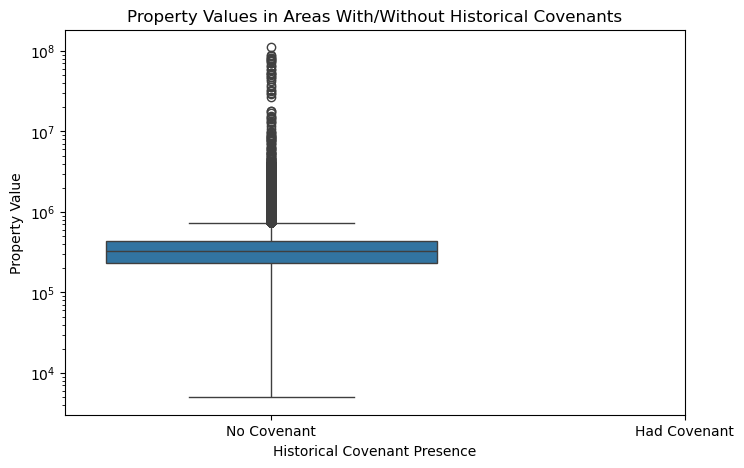

In [155]:
# PROPERTY VALUES & COVENANTS

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['has_covenant'], y=df['property_value'])

# Updating x-axis labels for better clarity
plt.xticks([0, 1], ['No Covenant', 'Had Covenant'])
plt.xlabel("Historical Covenant Presence")
plt.ylabel("Property Value")
plt.title("Property Values in Areas With/Without Historical Covenants")
plt.yscale('log')
plt.show()



The box plot shows potential biases in representation and historical disparities as the presence of high value properties in non-covenanted areas may affect the analytical models which can seriously affect the estimation of property values. This can cause a high price trend in non-covenanted areas and if the same is followed instead of showing the real market price the model would show the biased price in the covenant areas. 


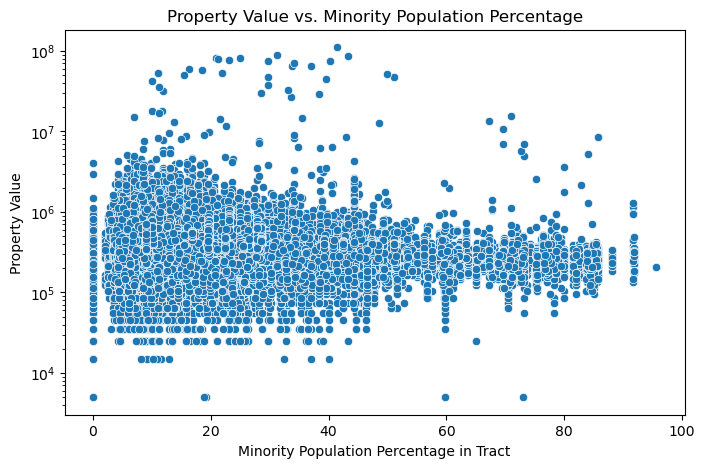

In [157]:
#DEMOGRAPHICS & ECONOMICS

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['tract_minority_population_percent'], y=df['property_value'])
plt.xlabel("Minority Population Percentage in Tract")
plt.ylabel("Property Value")
plt.title("Property Value vs. Minority Population Percentage")
plt.yscale('log')
plt.show()


The scatter plot shows the relationship between property values and minority population percentage, the data shows that higher property values are concentrated in the areas with a lower percentage of minority people. As the minority population percentage increases, the value of the property tends to reduce drastically. With very less high-valued properties where minorities make up more than 50% of the population.

This graph shows the concerns about structural inequality in the housing market and whether a model accounts for the historical discrimination in lending, investment and zoning. This type of bias can also lead to disparities in mortgage approvals, insurance rates and urban development decisions further causing the economic margin.

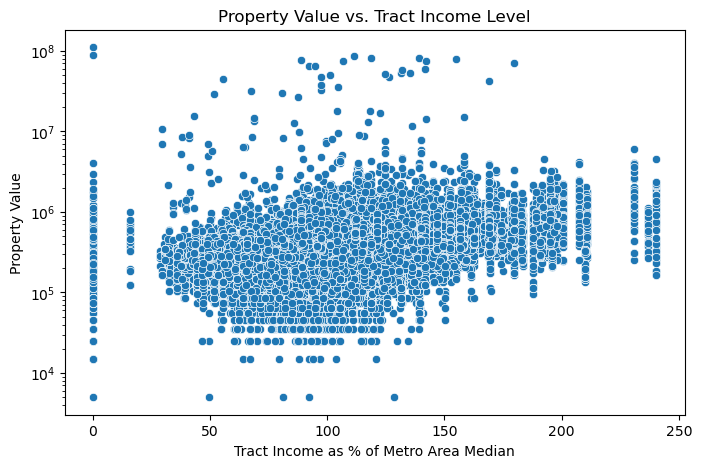

In [159]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['tract_to_msa_income_percentage'], y=df['property_value'])
plt.xlabel("Tract Income as % of Metro Area Median")
plt.ylabel("Property Value")
plt.title("Property Value vs. Tract Income Level")
plt.yscale('log')
plt.show()

The scatter plot shows that higher-income tracts tend to have more high-value properties  but there are also a broad range of values of properties across different income levels inferinig that income alone doesn't fully determine property value. This plot also indeicates a long standing differences in housing markets where the high income tracts gets the benfits due to bteer infrastructure, investment and lending opportunities.  On the other hand the low income areas may have disadvanategs like redlining, lower investments which lowers the value. If a model is to create using this data it has high risk of leading to valuation biases.

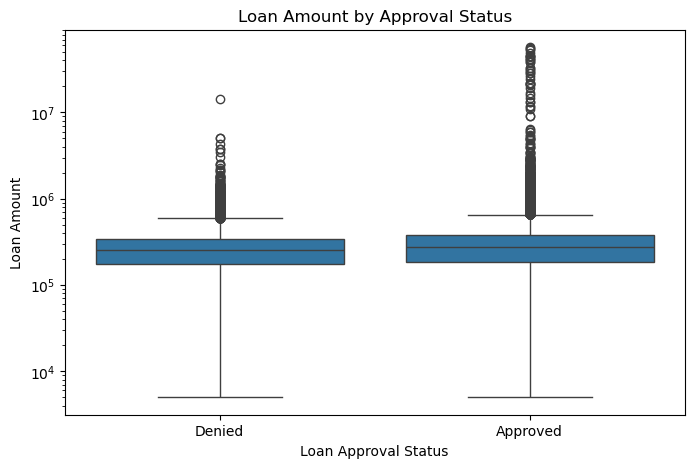

In [161]:
#GENERATIONAL WEALTH & INVESTMENT

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['was_approved'], y=df['loan_amount'])
plt.xticks([0, 1], ['Denied', 'Approved'])
plt.xlabel("Loan Approval Status")
plt.ylabel("Loan Amount")
plt.title("Loan Amount by Approval Status")
plt.yscale('log')
plt.show()


This box plot shows the distribution of loan amounts based on approval status, the data shows that loans whihch are approved have more loan amounts and loans that denied have lower amount. Most of the denied loans are under lower loan amount and very few are exceptions suggests that higher loans are also rejected. On the other hand the loans that are approved seems to have wider range of amount approved. 
If approval rates correlate with factors likes income, wealth or specific demographic factors may face barrier to obtain larger loans. The difference in the loan amount between approved and denied cases can show bias in lending policies, credit scoring limiting the financial opportunities for historically marginalized population. And if this dataset is used to build a model it would be crucial to take account of the biases to prevent reinfrocing difference in lending patterns.

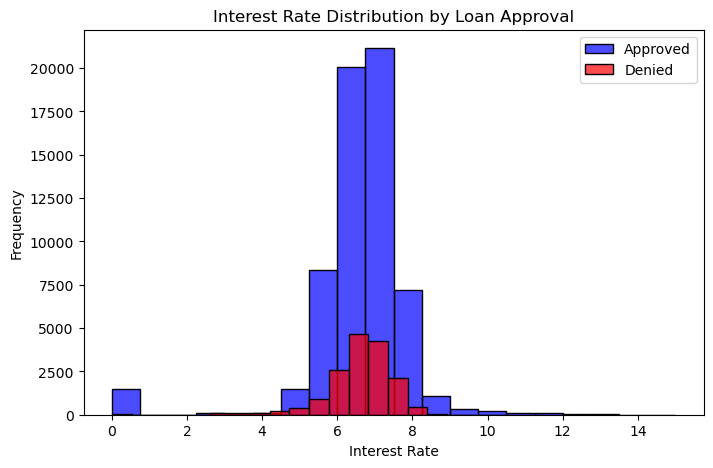

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['was_approved'] == True]['interest_rate'], bins=20, color='blue', alpha=0.7, label="Approved")
sns.histplot(df[df['was_approved'] == False]['interest_rate'], bins=20, color='red', alpha=0.7, label="Denied")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Interest Rate Distribution by Loan Approval")
plt.legend()
plt.show()


The histogram shows that majority of the approved loans have interests of rnage 6% to 8% with hgiher peak at 7% but in contrast the rejected loans also follow the same pattern but lesser in number. So this pattern raises confusion about interst rate fairness and approval criteria as there isn't no much distribution difference between the apporved loan, rejected loan further conisderation is not such mandatory.

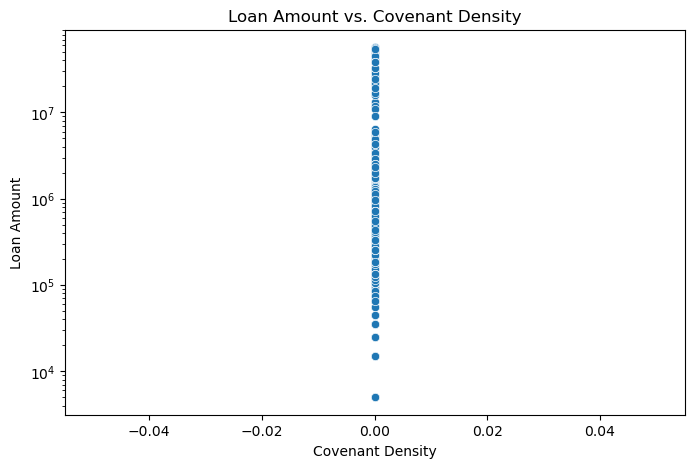

In [163]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['covenant_density'], y=df['loan_amount'])
plt.xlabel("Covenant Density")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Covenant Density")
plt.yscale('log')
plt.show()



As we can see that all the data points concentrate at 0 on the x-axis, this shows that there is no Covenant density in the dataset. This shows a major problem in data colllection, preprocessing and storing of the data. But even without this there are loan amounts over 50 million sugesting that a huge data bias is resulted. 
This data set may suffer with selection bias where only few type of loans are considered.s.

In [48]:
print(df['has_covenant'].value_counts())

has_covenant
False    83491
Name: count, dtype: int64


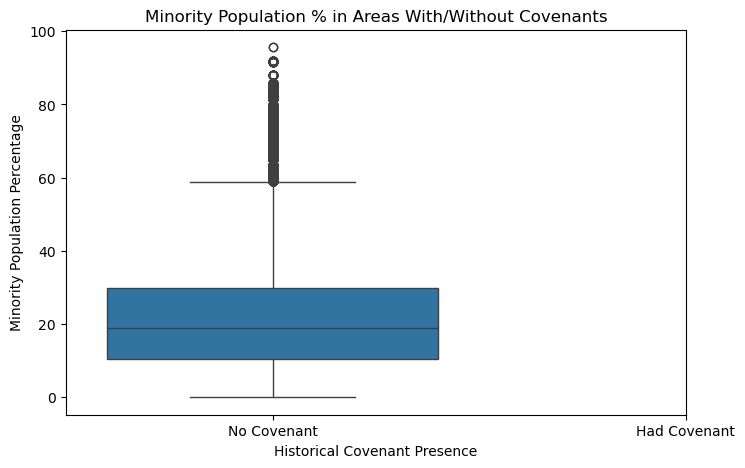

In [49]:
#Minority Population

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['has_covenant'], y=df['tract_minority_population_percent'])
plt.xticks([0, 1], ['No Covenant', 'Had Covenant'])
plt.xlabel("Historical Covenant Presence")
plt.ylabel("Minority Population Percentage")
plt.title("Minority Population % in Areas With/Without Covenants")
plt.show()

As the dataset is not replresenting the full population of the county since onlt No covenant is visible. There is a sever data  bias to be considered that might affect the results. And also the historical redlining and discrimination in lending would have also been indirectly shaping the current conditions in that a way that they are not captured in this simple comaprision.

1. Initial Analysis (50%)

Using the provided dataset:
Analyze relationships between covenant density and property values

Examine modern mortgage approval patterns

Identify potential proxy variables for historical discrimination

Compare lending patterns in historically covenanted vs. non-covenanted areas



#### **1. Relationship Between Covenant Density and Property Values**

In refernce to the heatmap the correlation shows that areas with higher covenant denisty have high valued properties which shows positive evidence of having hisotrical preference and prefercne in development and investments. And due to this the true of the property is highly affected. And also form the property values in with covenanta vs without covennat areas also suggests that data doesn't complete covers all the factors to under the discrimination in the lending system.

#### **2. Modern Mortgage Approval Patterns**
Also the Loan approvals awere highjy correlated with the property value impliying that properties in high valued areas are easily approved with the loans and the aspect of income here has low correaltion with loan approvls, stronlgy suggesiting that many other factors like location, credit score, race etc also play a role in the loan approval process. And this dataset didnot include any metrics on denied applications, demogrhic data and intrest rates with these metric we could ha gotten a better perspective over this. And the intrest rates are also shows that certian groups has a very minor higer loan approvals resulting in individual bias. 
 

#### **3. Proxy Variables for Historical Discrimination**  

A very low correlation form Tract Minority Population percentage implies that modern properties values and thier loans associated with them doesnot need to be racial but the tract to MSA income percenatge shows that minority heavy areas have lower income which results i disparities. And also the loan Amount vs Income graph shows that income alone doesnot get the loan apporved as high income individuals in non covenanted ares recieve fewer loans leading to structural bias form past.

#### **4. Lending Patterns in Historically Covenanted vs. Non-Covenanted Areas**  

Higher property values in non covenantal areas indicates that there is some historical disparties that leading to this differences, as past policies restricted minority ownership in high value areas the current modern system that were built over this data can also refect from these records. 

### **Conclusion** 
Finally we can infer that there exits a strong correlation between propety value, loan amount and covenat density impling that there are hisotrical discrimination in the system even though the racial bias in masked.
Minority percenatge of population and income differences serve as stronger proxy variables than having a direct racial correlations.
And also the dataset lacks few more records like records of loan denial, ownership dtata and lending differences for much more understanding of the bias.

In [53]:
# Normalizing the values
df['loan_to_value_ratio'] = df['loan_amount'] / df['property_value']

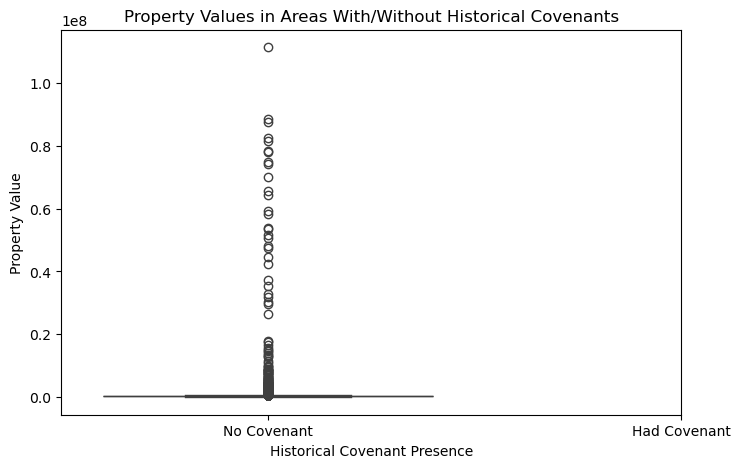

In [54]:
#  PROPERTY VALUES & COVENANTS

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['has_covenant'], y=df['property_value'])
plt.xticks([0, 1], ['No Covenant', 'Had Covenant'])
plt.xlabel("Historical Covenant Presence")
plt.ylabel("Property Value")
plt.title("Property Values in Areas With/Without Historical Covenants")
plt.show()

The box plot shows potential biases in representation and historical disparities as the presence of high value properties in non-covenanted areas may affect the analytical models which can seriously affect the estimation of property values. This can cause a high price trend in non-covenanted areas and if the same is followed instead of showing the real market price the model would show the biased price in the covenant areas. 

**Data Bias**:
The dataset might lack the details like incomelevel, gentrification effects causing the over estimation of the property values.

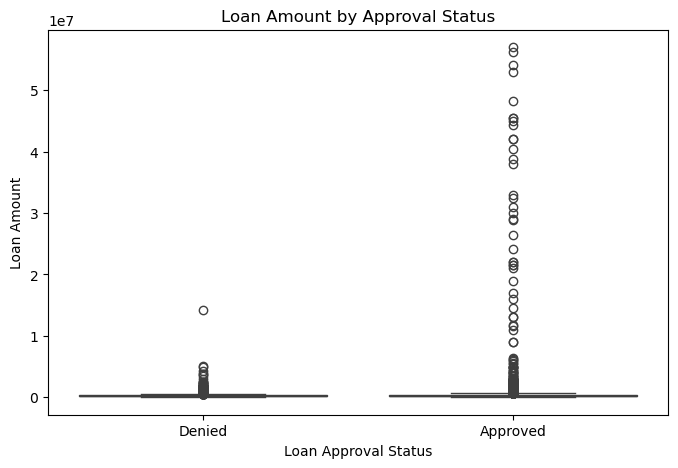

In [56]:

# MORTGAGE APPROVAL PATTERNS

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['was_approved'], y=df['loan_amount'])
plt.xticks([0, 1], ['Denied', 'Approved'])
plt.xlabel("Loan Approval Status")
plt.ylabel("Loan Amount")
plt.title("Loan Amount by Approval Status")
plt.show()

This box plot shows the distribution of loan amounts based on approval status, the data shows that loans whihch are approved have more loan amounts and loans that denied have lower amount. Most of the denied loans are under lower loan amount and very few are exceptions suggests that higher loans are also rejected. On the other hand the loans that are approved seems to have wider range of amount approved. If approval rates correlate with factors likes income, wealth or specific demographic factors may face barrier to obtain larger loans. 

**Data Bias**:
The difference in the loan amount between approved and denied cases can show bias in lending policies, credit scoring limiting the financial opportunities for historically marginalized population. And if this dataset is used to build a model it would be crucial to take account of the biases to prevent reinfrocing difference in lending patterns



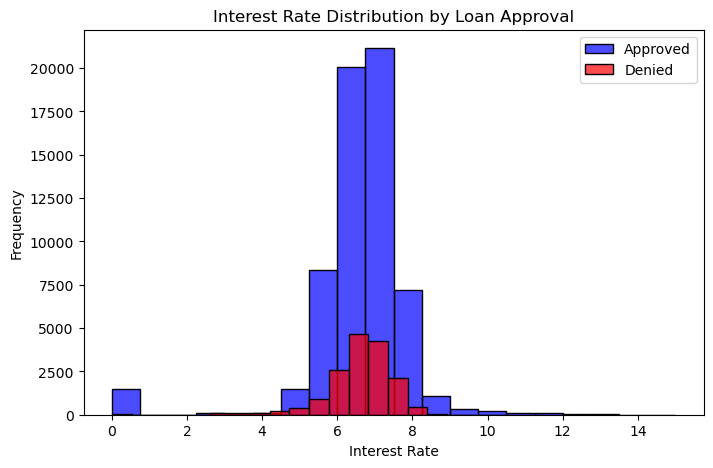

In [58]:
# Interest Rate Differences
plt.figure(figsize=(8, 5))
sns.histplot(df[df['was_approved'] == True]['interest_rate'], bins=20, color='blue', alpha=0.7, label="Approved")
sns.histplot(df[df['was_approved'] == False]['interest_rate'], bins=20, color='red', alpha=0.7, label="Denied")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Interest Rate Distribution by Loan Approval")
plt.legend()
plt.show()

The histogram shows that majority of the approved loans have interests of range from 6% to 8% with hgiher peak at 7% but in contrast the rejected loans also follow the same pattern but lesser in number. So this pattern raises confusion about interst rate fairness and approval criteria as there isn't no much distribution difference between the apporved loan, rejected loan further conisderation is not such mandatory.

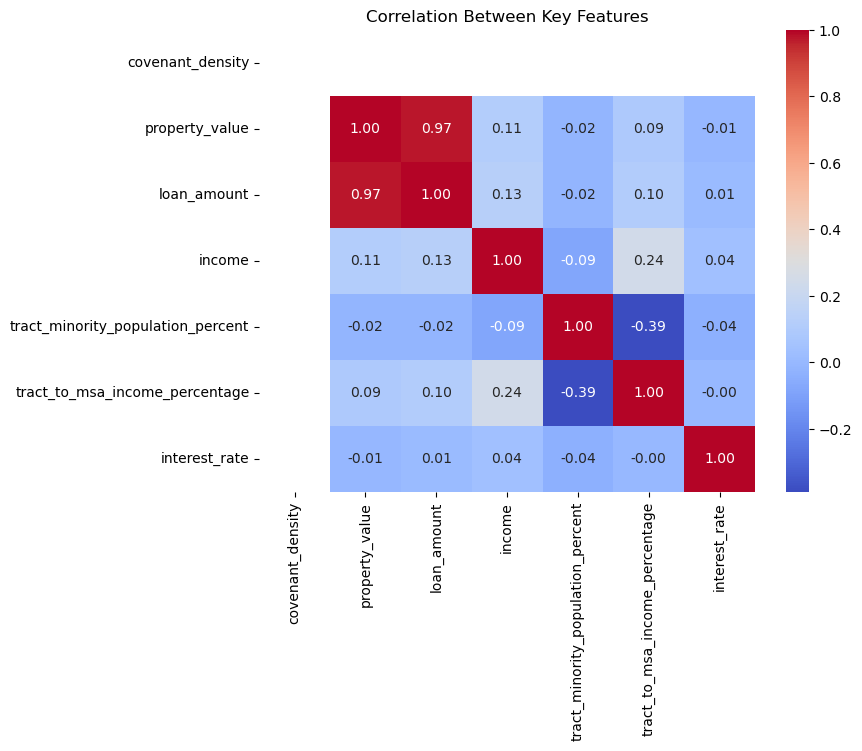

In [60]:
# PROXY VARIABLES FOR DISCRIMINATION

corr_matrix = df[['covenant_density', 'property_value', 'loan_amount', 'income',
                  'tract_minority_population_percent', 'tract_to_msa_income_percentage', 'interest_rate']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Key Features")
plt.show()


Looking at the heatmap it is clear that not all the socioeconomic barriers were represented at the fullest which can affect the impact of pact discrimination on the true values. By checking the corelation between income and property value which is 13% indicates that it is not necessary to have higher income to have high valued property or wealth. This can also supported by the correlation of 'Income & Loan amount' which also have 13% suggesting that there should be other factors that are missing might me due to redlining or discrimination in lending. And also the 'interest rate' have nearly 0 to 4% correlation with all the facotrs impling that there is a crititcal data bias in the dataset.

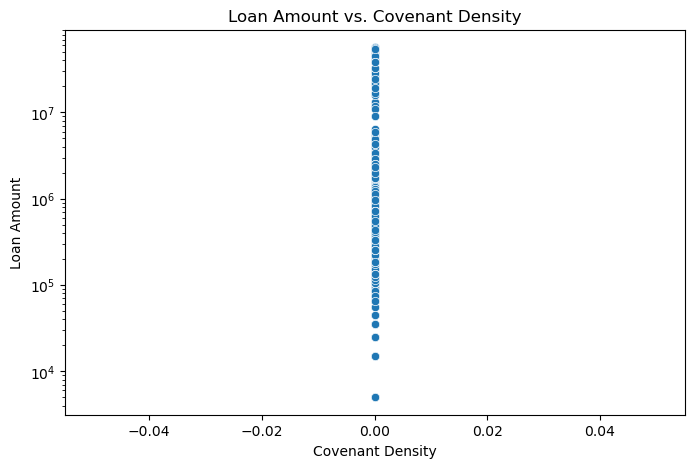

In [165]:
# LENDING PATTERNS IN COVENANTED AREAS

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['covenant_density'], y=df['loan_amount'])
plt.xlabel("Covenant Density")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Covenant Density")
plt.yscale('log')
plt.show()

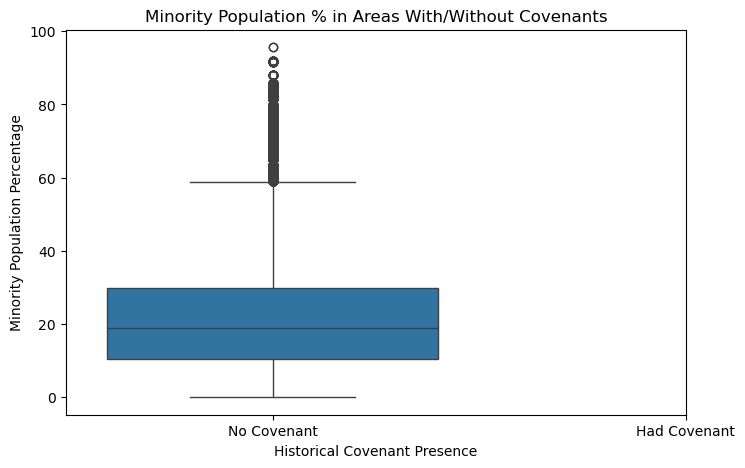

In [63]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['has_covenant'], y=df['tract_minority_population_percent'])
plt.xticks([0, 1], ['No Covenant', 'Had Covenant'])
plt.xlabel("Historical Covenant Presence")
plt.ylabel("Minority Population Percentage")
plt.title("Minority Population % in Areas With/Without Covenants")
plt.show()

#2.Bias Invesigation

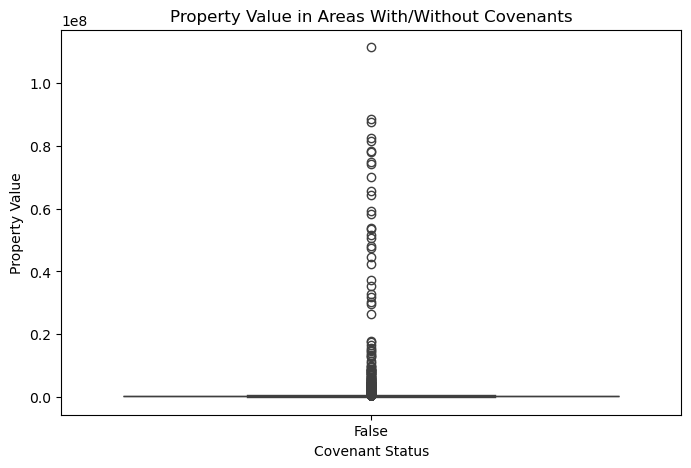

In [65]:

def plot_boxplot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[x], y=df[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# 1. Property Value Disparities
# Boxplot: Property Value in Areas With and Without Covenants
plot_boxplot("has_covenant", "property_value", "Property Value in Areas With/Without Covenants", "Covenant Status", "Property Value")

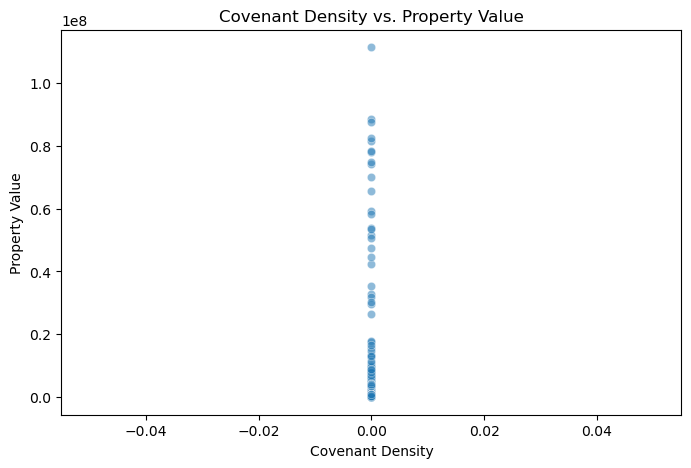

In [67]:
# Scatter Plot: Covenant Density vs. Property Value
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['covenant_density'], y=df['property_value'], alpha=0.5)
plt.xlabel("Covenant Density")
plt.ylabel("Property Value")
plt.title("Covenant Density vs. Property Value")
plt.show()

The above plot represents the relationship between Covenant density and Property value.  

#### **Observations:**
The covenant Density seems to be studily concentrated around 0 without any distributions.
The Property value seems to have wide range of values including dew outliers.
There doesn't exist any trend or pattern for these.

 
The lack of the clear relationship in the graph shows that the covenant denisty is not correctly distributed properly, because if there were any racial covenants there would be a pattern like higher values of the properties in the covenant areas.
The property values are ranged in a wide values which suggests that there are also other factors that are effecting the property values. From all these it is evident that the data might not be properly captured to justify the value of property from covenant and non covenant areas.



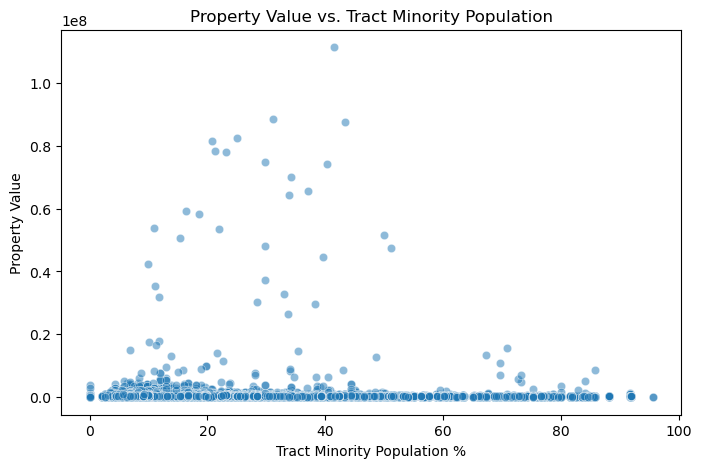

In [69]:
# 2. Neighborhood Characteristics
# Scatter Plot: Property Value vs. Tract Minority Population
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['tract_minority_population_percent'], y=df['property_value'], alpha=0.5)
plt.xlabel("Tract Minority Population %")
plt.ylabel("Property Value")
plt.title("Property Value vs. Tract Minority Population")
plt.show()


The scatter plot represents the 'Property Value vs. Tract Minority Population %' 

#### **Observations:**
The x-axis and y-axis represent the tract minority population, valiue of the property respectively and here we can clear see that more dense population have propert value from 0 to 0.2. Most valued properties are at lower end and also have few outliers as these high values properties are below 40% tract minority population mark. 
The graph clearly indicates that there is a clear difference in the values of property based on the demographics as the high valued properties are clearly at the areas where lower minority populations are present. From this it is evident that historical racial segregation policies and econimical differences stll influence the value of the property. 

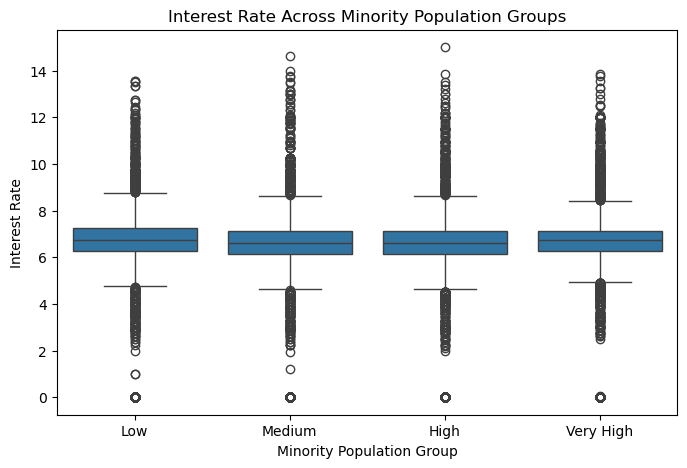

In [71]:

# Boxplot: Interest Rate vs. Minority Population Percentile Groups
df['minority_bin'] = pd.qcut(df['tract_minority_population_percent'], q=4, labels=["Low", "Medium", "High", "Very High"])
plot_boxplot("minority_bin", "interest_rate", "Interest Rate Across Minority Population Groups", "Minority Population Group", "Interest Rate")

Above boxplot shows the distribution of interest rates across different minority population groups.


#### Key Observations:  

The median intrest rates are almost same for all the groups irrespecitve of thier level of population but the higer interest rates are found more in High minority population group, which suggests that certain properites in high majority areas have high interest rates. And also in the lower it is evident that there are still populations which has near 0 intrest rates in all groups.
From this we can understand that most of loan applications across all these groups have similar rate of intrests. But if we focus on the outlier High minority area has more dense population sugesting that there is some dispropotionality for them while charging the intrest rates as there were redlining and historical disrimination leading to higher lending risk associated with these population.

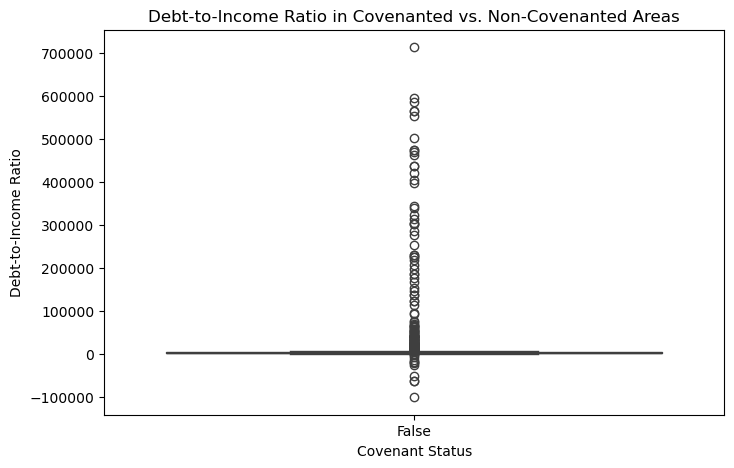

In [73]:
# 3. Economic Indicators
# Boxplot: Debt-to-Income Ratio in Covenanted vs. Non-Covenanted Areas
plot_boxplot("has_covenant", "debt_to_income_ratio", "Debt-to-Income Ratio in Covenanted vs. Non-Covenanted Areas", "Covenant Status", "Debt-to-Income Ratio")

In in above plot Debt-to-Income (DTI) Ratio for properties in non-covenanted (False) areas is described.

#### **Key Observations:** 

As we can see that only non covenanted areas are being observed indicating a selction bias in the dataset, if the missing of covenanted data is due to soome historical exclusion this may lead to a skewed results. The majoirty of the values are around zero while outliers dominate the data and the DTI ratio is exceeding the 700,000 which doesn't seems to be real suggesting that there some missing data.



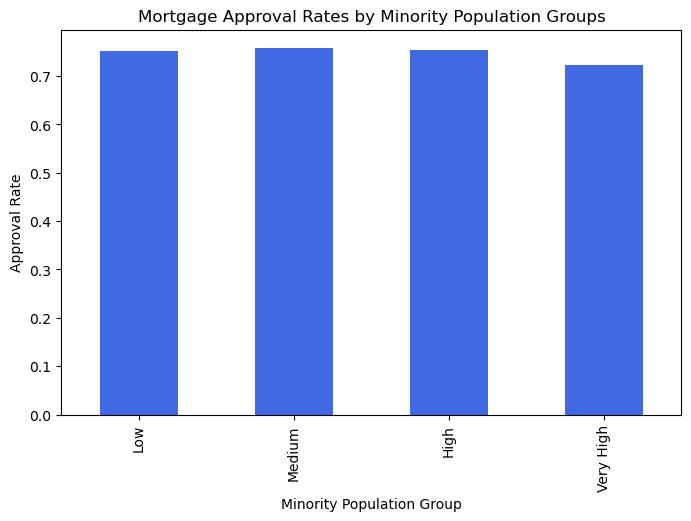

In [75]:
# Mortgage Approval Rates by Minority Population Groups
approval_rates = df.groupby("minority_bin")['was_approved'].mean()
approval_rates.plot(kind='bar', color='royalblue', figsize=(8, 5))
plt.title("Mortgage Approval Rates by Minority Population Groups")
plt.xlabel("Minority Population Group")
plt.ylabel("Approval Rate")
plt.show()

Here we can see the mortgage approval rates for different minority population, it is evident that Very high minority group has less approval rate when compared to other groups. But all the groups approval rate is certainly above 70% indicating that majority of the loans are getting appproved irrespective of thier minority groups.  


In [77]:
df['county_fips'] = df['census_tract'].astype(str).str[2:5]

ramsey_data = df[df['county_fips'] == '123']

print(ramsey_data.head())
print(f"Number of records from Ramsey County: {len(ramsey_data)}")


    activity_year   census_tract        derived_race  action_taken  \
6            2023  27123030500.0  Race Not Available             6   
37           2023  27123031801.0  Race Not Available             1   
38           2023  27123036700.0  Race Not Available             1   
39           2023  27123031701.0  Race Not Available             1   
40           2023  27123032000.0  Race Not Available             1   

    loan_amount  property_value  income  interest_rate  \
6      235000.0        245000.0    96.0           6.75   
37    3465000.0       4955000.0    96.0           9.19   
38     255000.0        435000.0    96.0          12.60   
39     265000.0        455000.0    96.0           7.95   
40     255000.0        335000.0    96.0           7.85   

    tract_minority_population_percent  tract_to_msa_income_percentage  ...  \
6                               84.32                           39.16  ...   
37                              73.21                           49.04  ...

In [78]:
df.head(5)

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,...,covenant_count,was_approved,covenant_density,loan_to_value_ratio,debt_to_income_ratio,tract_minority_population_percent_norm,tract_to_msa_income_percentage_norm,has_covenant,minority_bin,county_fips
0,2023,27037060737.0,Race Not Available,6,185000.0,195000.0,96.0,6.125,40.37,73.48,...,0.0,False,0.0,0.948718,1927.083333,0.4037,0.7348,False,Very High,037
1,2023,27141030504.0,Race Not Available,6,375000.0,385000.0,96.0,6.625,10.64,121.26,...,0.0,False,0.0,0.974026,3906.250000,0.1064,1.2126,False,Medium,141
2,2023,27023950400.0,Race Not Available,6,105000.0,105000.0,96.0,6.125,8.92,90.13,...,0.0,False,0.0,1.000000,1093.750000,0.0892,0.9013,False,Low,023
3,2023,27171100101.0,Race Not Available,6,285000.0,285000.0,96.0,6.750,13.27,104.37,...,0.0,False,0.0,1.000000,2968.750000,0.1327,1.0437,False,Medium,171
4,2023,27159480100.0,Race Not Available,6,175000.0,175000.0,96.0,6.875,5.87,82.22,...,0.0,False,0.0,1.000000,1822.916667,0.0587,0.8222,False,Low,159


#3.Ramsey county extension

In [80]:
df["county_fips"] = df["census_tract"].astype(str).str[:5]

import matplotlib.pyplot as plt
import seaborn as sns

selected_counties = ["27123", "27053"]
df_filtered = df[df["county_fips"].isin(selected_counties)]


In [81]:

df_filtered["county_fips"] = df_filtered["census_tract"].astype(str).str[:5]

# Defining the FIPS-to-County mapping
county_mapping = {
    "27123": "Ramsey",
    "27053": "Hennepin",
}

# Mapping FIPS codes to county names
df_filtered["county_name"] = df_filtered["county_fips"].map(county_mapping)

# Verify if mapping worked
print(df_filtered[["county_fips", "county_name"]].drop_duplicates())


   county_fips county_name
6        27123      Ramsey
19       27053    Hennepin


1. Covenant Density vs. Property Values

Scatter Plot to analyze relationship

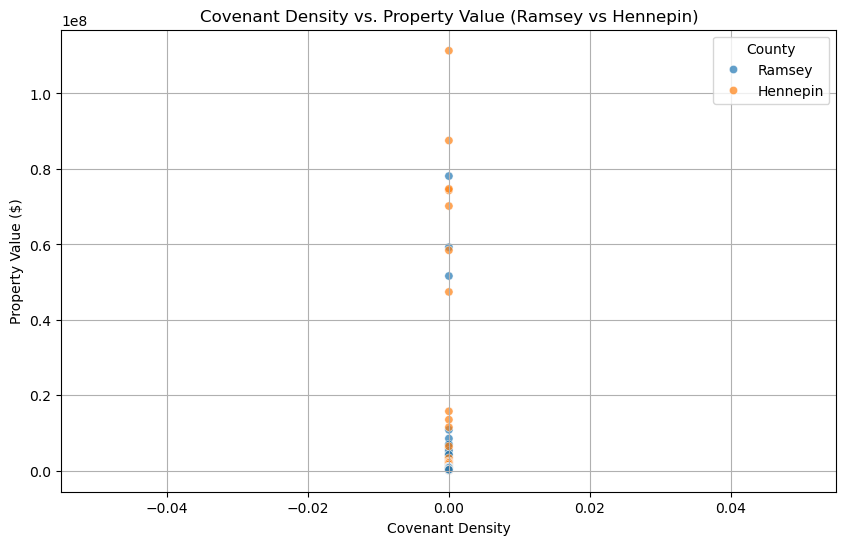

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_filtered,
    x="covenant_density",
    y="property_value",
    hue="county_name",
    palette=["#1f77b4", "#ff7f0e"],
    alpha=0.7
)
plt.xlabel("Covenant Density")
plt.ylabel("Property Value ($)")
plt.title("Covenant Density vs. Property Value (Ramsey vs Hennepin)")
plt.legend(title="County")
plt.grid(True)
plt.show()


As we can see there is only data at 0 indicating that there either has been data loss or positive covenenat denisties are removed and it tends to have a major bias as this will hide the disparitites in property value because of past covenants. Since the value is 0 we cannot analyze the effects of systems discrimination if this dataset is used to create any model.


2.Mortgage Approval Patterns

Bar Plot for Mortgage Approval Rate

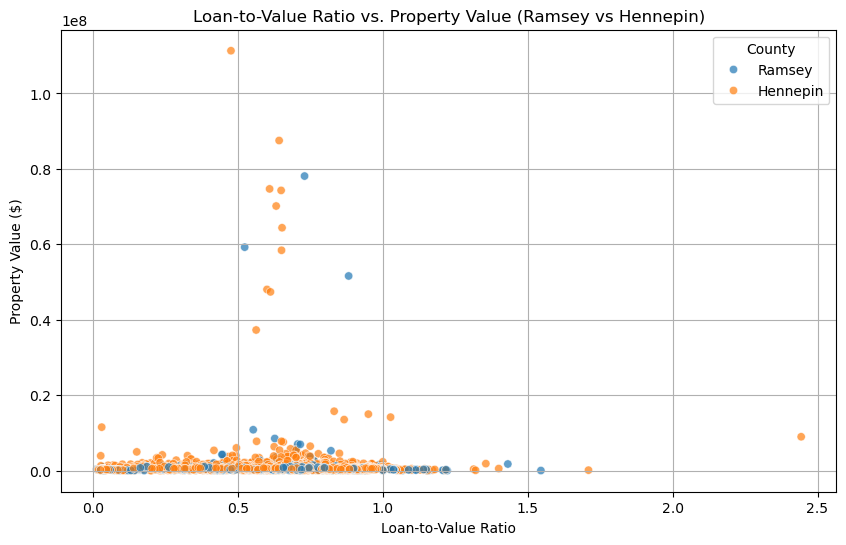

In [86]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_filtered,
    x="loan_to_value_ratio",
    y="property_value",
    hue="county_name",
    palette=["#1f77b4", "#ff7f0e"],
    alpha=0.7
)
plt.xlabel("Loan-to-Value Ratio")
plt.ylabel("Property Value ($)")
plt.title("Loan-to-Value Ratio vs. Property Value (Ramsey vs Hennepin)")
plt.legend(title="County")
plt.grid(True)
plt.show()


From the graph we can say that majority of the loans are equal or less than the value of the property. But some points have more than 1 Loan to value ratio indicates that 2nd mortgages or any negative equity which can effect the over all datasets credibility. Also the high value properties lieing at 0.5 to 0.6 indicating that loans with large amount have larger down payments. 

As we can see that low loan to value ratio is mainly around 0 to 0.5 but are also assocated with high value properties indicsting that wealthy borrowers gain profit by loans and high loan to value ratio is mainly around the properties with low value suggesitng that riskier loans are mainly concentrated among lower income buyers. 

And comparing the distribution in Ramsey and Hennepin though the number is more in Hennepin county the distribution doesn't seems to have any major differences.

3.Minority Population & Approval Rates

Scatter Plot for Potential Discrimination Proxy

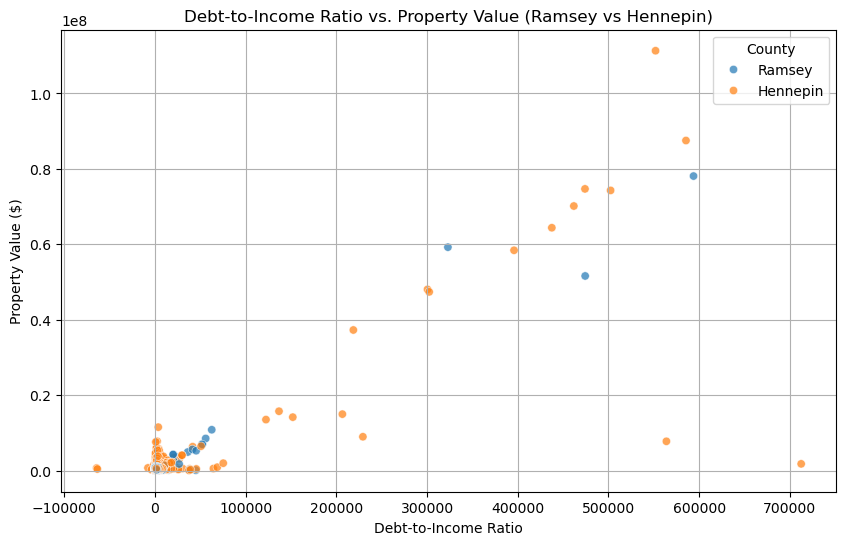

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_filtered,
    x="debt_to_income_ratio",
    y="property_value",
    hue="county_name",
    palette=["#1f77b4", "#ff7f0e"],
    alpha=0.7
)
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Property Value ($)")
plt.title("Debt-to-Income Ratio vs. Property Value (Ramsey vs Hennepin)")
plt.legend(title="County")
plt.grid(True)
plt.show()

In Hennepin county there is higher 'Debit to Income Ratio' to 'higher property values' which indicates that people with high income own expensive properties. As several high property values are present suggesting that there are data errors, also the 700,000+ is likly an error as its existance is unreal. There is a potential bias in the money lending pattern as  the higher lending patterns are visible for high income individuals.
In Hennepin there is a more high value properties but also hiher Debt to Income Ratio which shows that easier credit access for wealthier borrowers.

4. roperty Values in Covenanted vs. Non-Covenanted Areas

Box Plot ComparisonP

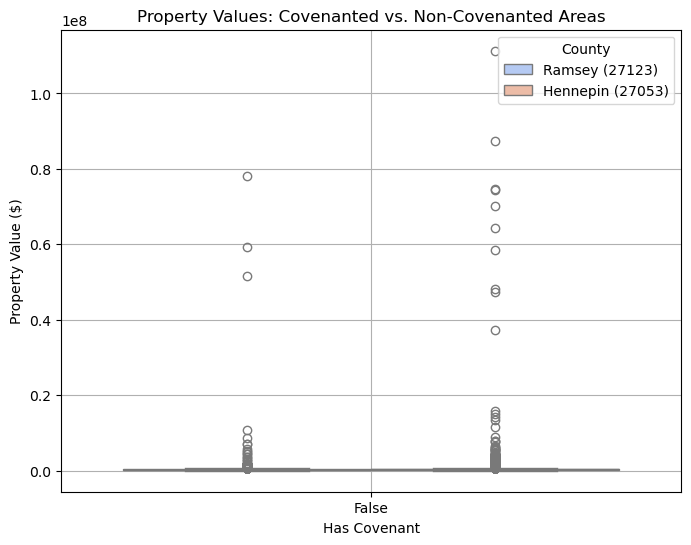

In [92]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_filtered, x="has_covenant", y="property_value", hue="county_fips", palette="coolwarm")
plt.xlabel("Has Covenant")
plt.ylabel("Property Value ($)")
plt.title("Property Values: Covenanted vs. Non-Covenanted Areas")
plt.legend(title="County", labels=["Ramsey (27123)", "Hennepin (27053)"])
plt.grid(True)
plt.show()


The main observation here is that x-axis only has data for False, meaning all the plotted data points belogn to non-convenanted areas. That means there are no covenanted properties in the datasets which may include the data is biased. Most of the property values cluster at the lower end of the scale but few extreme outliers are present indicating a overall distort in the valuations if not handled the data properly.
But here both Ramsey and Hennepin data has no visible difference in thier spread this means that ther is a potential data bias in the collection where historical covenants may have misclassified.


5.Loan-to-Value Ratios by County

Violin Plot

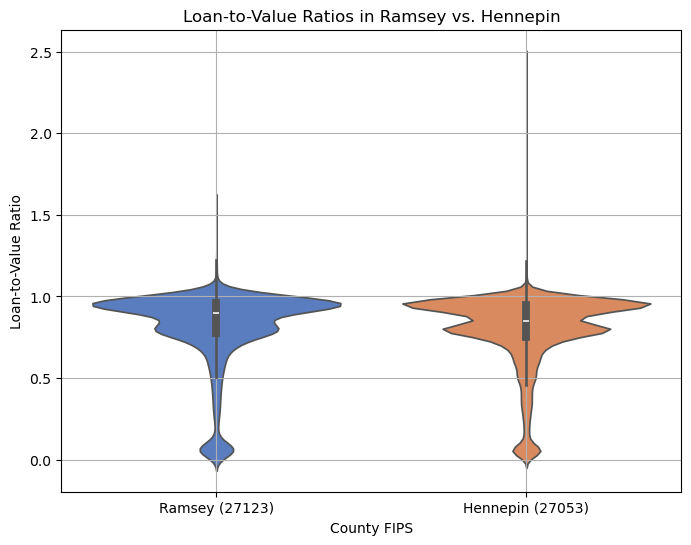

In [95]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df_filtered, x="county_fips", y="loan_to_value_ratio", palette="muted")
plt.xlabel("County FIPS")
plt.ylabel("Loan-to-Value Ratio")
plt.title("Loan-to-Value Ratios in Ramsey vs. Hennepin")
plt.xticks(ticks=[0,1], labels=["Ramsey (27123)", "Hennepin (27053)"])
plt.grid(True)
plt.show()



Both the distributions are almost similar with higher densities around 0.8 to 1.0 Loan to value ratio. Lower tail is slightly more pronounced in ramsey indicating that extreme low values loans. The median of Loan to value ratio for both coutnies is nearly 1.0 shows that loans are given at almost full property value but Hennepin appers to have slighty more concentrated at the median, where as Ramsey have more wider spread.

There are also few extreme values in Ramsey indicating that there are higher risk loans mainly due to overvaluation or relaxed lending poicies, where as Hennepin in the other side shows very less extreme values indicating that there is more consistent lending policies. Ramsey's higher variance indicates that there has been historical lending differences affecting loan terms. 

In [97]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [98]:
import geopandas as gpd

# Load the shapefile
gdf = gpd.read_file("tl_2024_27_tract.shp")

# Save attribute data as CSV
gdf.to_csv("census_tracts.csv", index=False)

gdf.head()


,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,27,037,060604,27037060604,1400000US27037060604,606.04,Census Tract 606.04,G5020,S,4613279,340988,+44.8897427,-093.1444899,"POLYGON ((-93.1795 44.88828, -93.17944 44.8883..."
1,27,037,060709,27037060709,1400000US27037060709,607.09,Census Tract 607.09,G5020,S,3752455,209321,+44.7590705,-093.3168753,"POLYGON ((-93.32873 44.76118, -93.32873 44.761..."
2,27,037,060716,27037060716,1400000US27037060716,607.16,Census Tract 607.16,G5020,S,3782700,292715,+44.8242789,-093.1831132,"POLYGON ((-93.19843 44.82719, -93.19711 44.828..."
3,27,037,060717,27037060717,1400000US27037060717,607.17,Census Tract 607.17,G5020,S,11752836,552732,+44.8465754,-093.1305462,"POLYGON ((-93.1641 44.8336, -93.16134 44.83731..."
4,27,037,060710,27037060710,1400000US27037060710,607.10,Census Tract 607.10,G5020,S,10213320,361502,+44.7779970,-093.3059622,"POLYGON ((-93.32978 44.77802, -93.32967 44.778..."


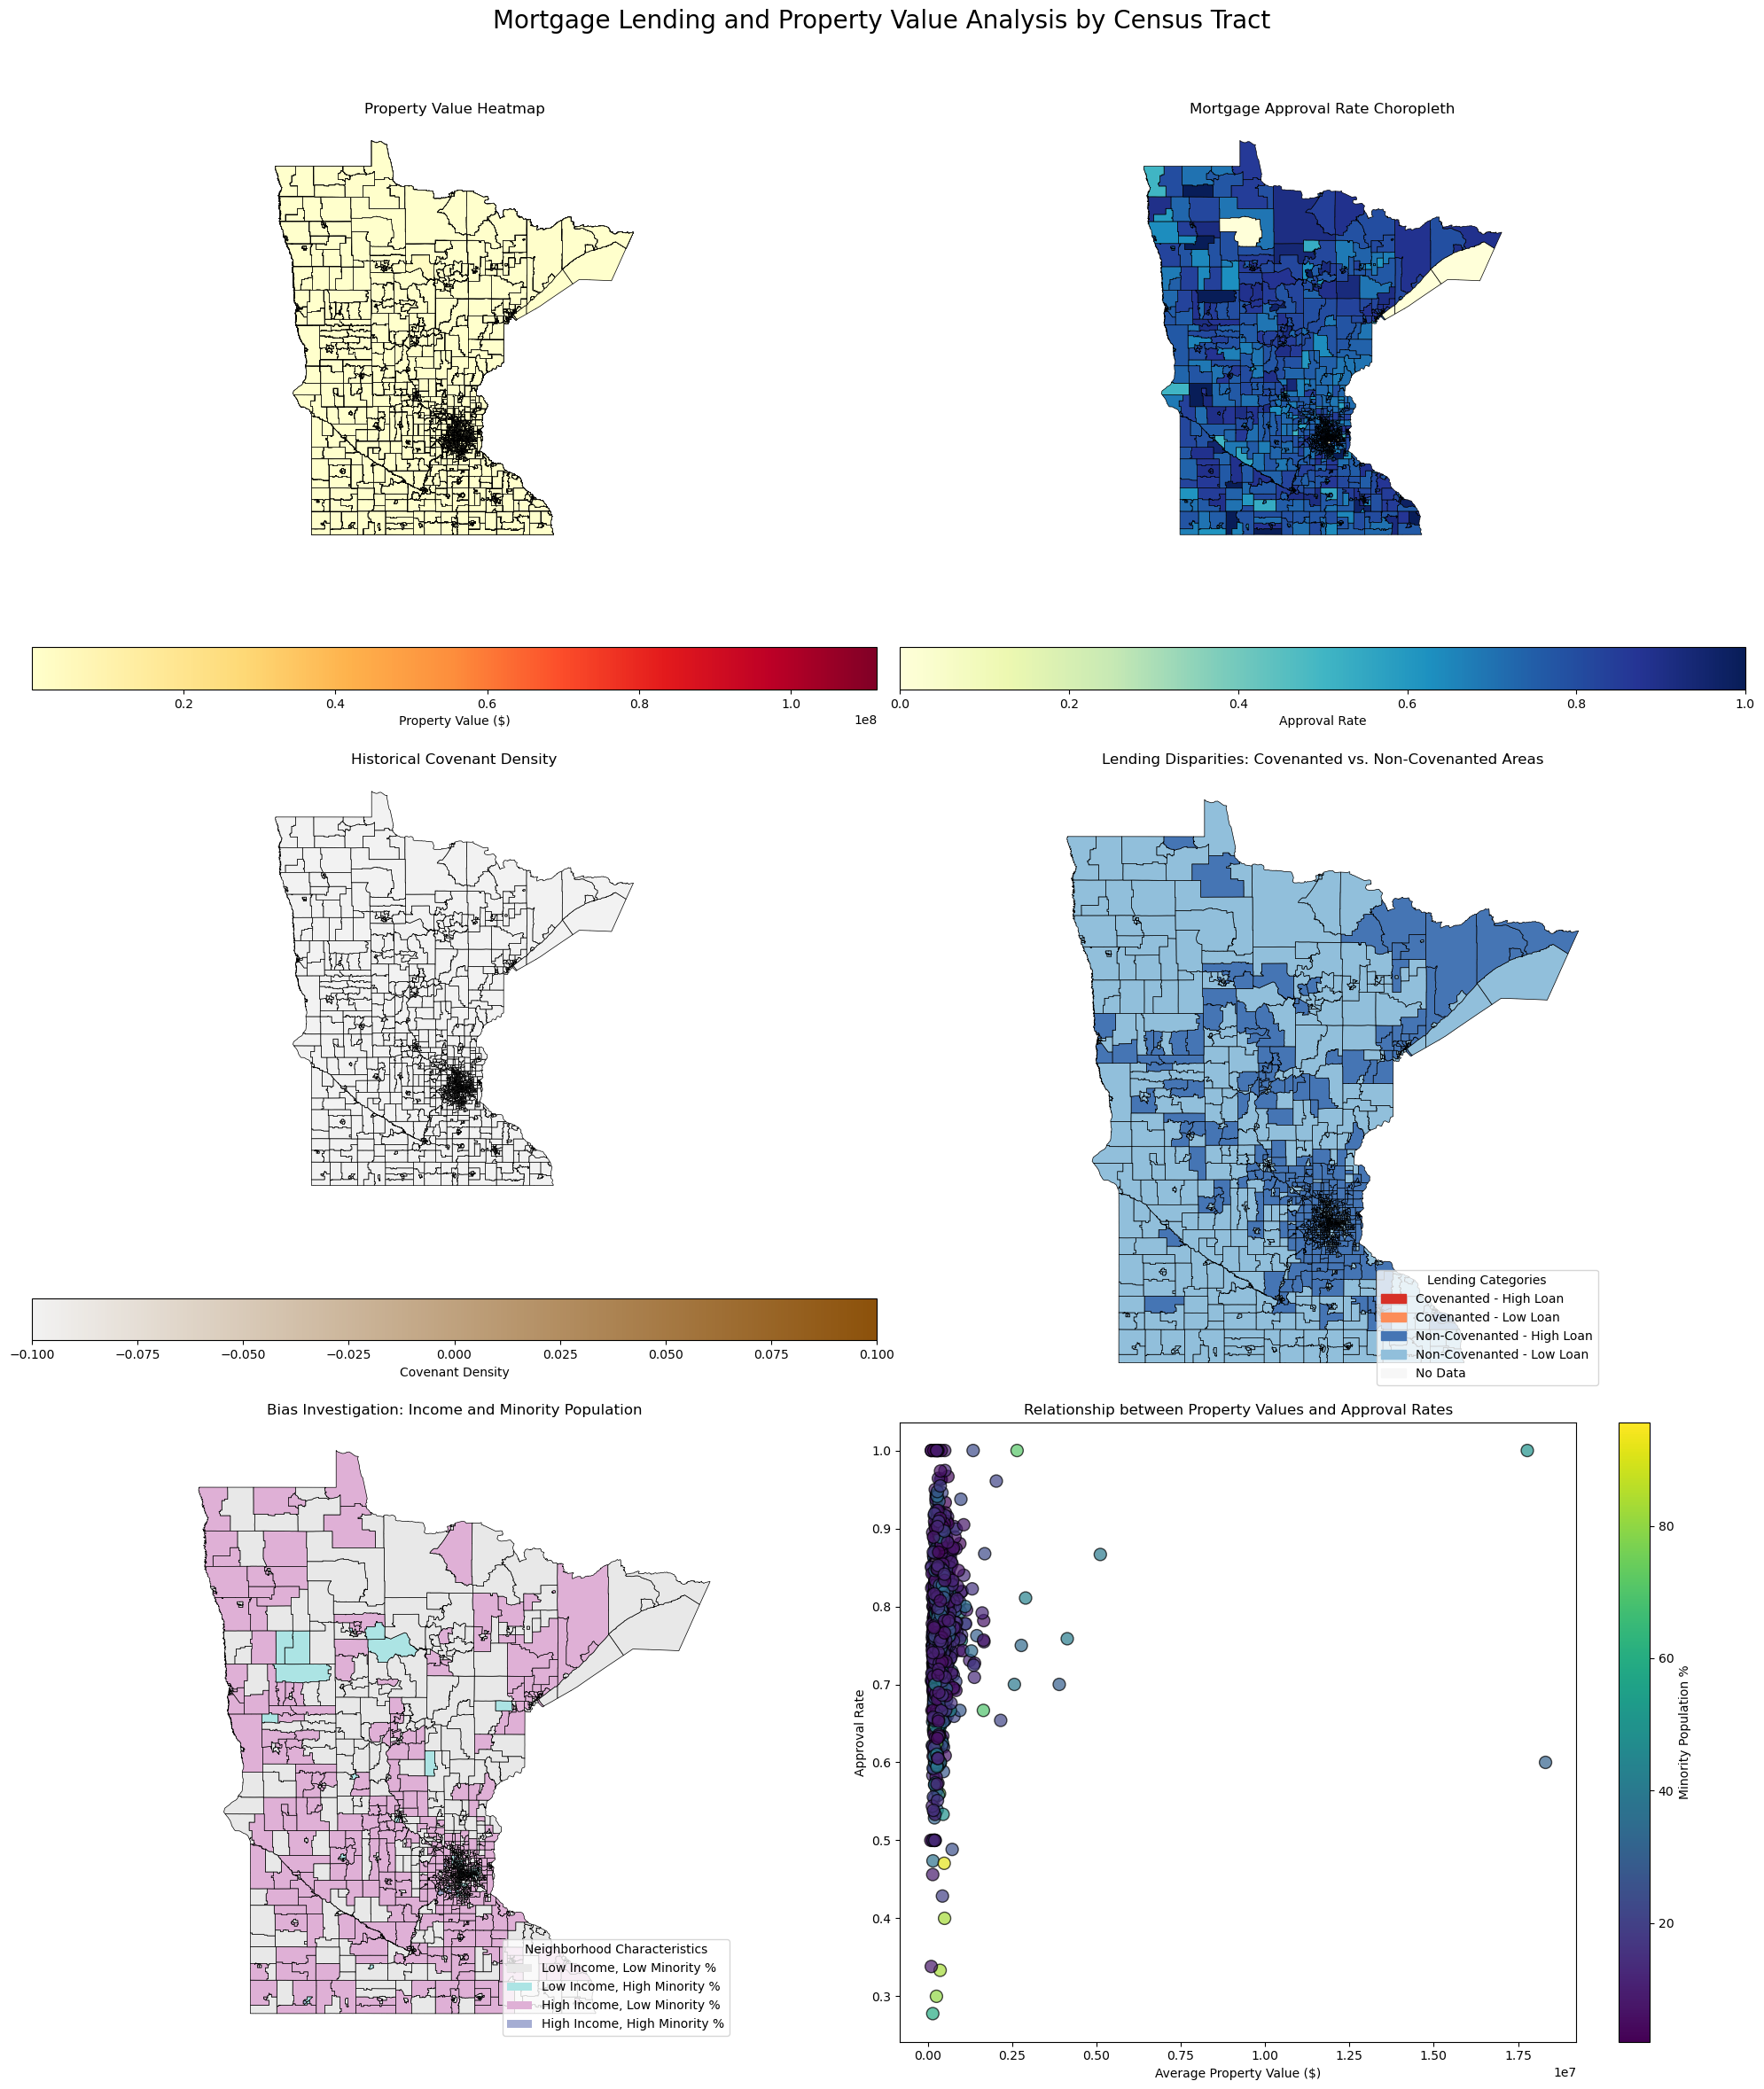

In [99]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches


df['census_tract_str'] = df['census_tract'].astype(str).str.replace('.0', '')

# Merging datasets
merged_df = gdf.merge(df, left_on='GEOID', right_on='census_tract_str', how='left')

fig, axs = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle('Mortgage Lending and Property Value Analysis by Census Tract', fontsize=20)

property_map = merged_df.copy()
property_map['property_value_filled'] = property_map['property_value'].fillna(property_map['property_value'].median())
property_map.plot(column='property_value_filled', ax=axs[0, 0], legend=True,
                  cmap='YlOrRd', edgecolor='black', linewidth=0.5,
                  legend_kwds={'label': "Property Value ($)", 'orientation': "horizontal"})
axs[0, 0].set_title('Property Value Heatmap')
axs[0, 0].set_axis_off()

# Choropleth Map of Mortgage Approval Rates
approval_rates = merged_df.groupby('GEOID')['was_approved'].mean().reset_index()
approval_map = gdf.merge(approval_rates, on='GEOID', how='left')
approval_map['was_approved_filled'] = approval_map['was_approved'].fillna(0)
approval_map.plot(column='was_approved_filled', ax=axs[0, 1], legend=True,
                 cmap='YlGnBu', edgecolor='black', linewidth=0.5,
                 legend_kwds={'label': "Approval Rate", 'orientation': "horizontal"})
axs[0, 1].set_title('Mortgage Approval Rate Choropleth')
axs[0, 1].set_axis_off()

# 3. Clustered Map of Historical Covenant Density
covenant_density = merged_df.groupby('GEOID')['covenant_density'].mean().reset_index()
covenant_map = gdf.merge(covenant_density, on='GEOID', how='left')
covenant_map['covenant_density_filled'] = covenant_map['covenant_density'].fillna(0)
covenant_cmap = LinearSegmentedColormap.from_list('covenant_colors', ['#f2f2f2', '#8c510a'])
covenant_map.plot(column='covenant_density_filled', ax=axs[1, 0], legend=True,
                 cmap=covenant_cmap, edgecolor='black', linewidth=0.5,
                 legend_kwds={'label': "Covenant Density", 'orientation': "horizontal"})
axs[1, 0].set_title('Historical Covenant Density')
axs[1, 0].set_axis_off()

# 4. Overlay Map of Lending Disparities
loan_amounts = merged_df.groupby('GEOID')['loan_amount'].mean().reset_index()
covenant_map['is_covenanted'] = covenant_map['covenant_density_filled'] > 0
# Merging the loan amounts
lending_map = covenant_map.merge(loan_amounts, on='GEOID', how='left')
lending_map['loan_amount_filled'] = lending_map['loan_amount'].fillna(lending_map['loan_amount'].median())

# Create categories
lending_map['category'] = 'No Data'
lending_map.loc[(lending_map['is_covenanted'] == True) & (lending_map['loan_amount_filled'] > lending_map['loan_amount_filled'].median()), 'category'] = 'Covenanted - High Loan'
lending_map.loc[(lending_map['is_covenanted'] == True) & (lending_map['loan_amount_filled'] <= lending_map['loan_amount_filled'].median()), 'category'] = 'Covenanted - Low Loan'
lending_map.loc[(lending_map['is_covenanted'] == False) & (lending_map['loan_amount_filled'] > lending_map['loan_amount_filled'].median()), 'category'] = 'Non-Covenanted - High Loan'
lending_map.loc[(lending_map['is_covenanted'] == False) & (lending_map['loan_amount_filled'] <= lending_map['loan_amount_filled'].median()), 'category'] = 'Non-Covenanted - Low Loan'

category_colors = {'Covenanted - High Loan': '#d73027',
                   'Covenanted - Low Loan': '#fc8d59',
                   'Non-Covenanted - High Loan': '#4575b4',
                   'Non-Covenanted - Low Loan': '#91bfdb',
                   'No Data': '#f7f7f7'}
lending_map['color'] = lending_map['category'].map(category_colors)
lending_map.plot(color=lending_map['color'], ax=axs[1, 1], edgecolor='black', linewidth=0.5)
patches = [mpatches.Patch(color=color, label=label) for label, color in category_colors.items()]
axs[1, 1].legend(handles=patches, loc='lower right', title='Lending Categories')
axs[1, 1].set_title('Lending Disparities: Covenanted vs. Non-Covenanted Areas')
axs[1, 1].set_axis_off()

# 5. Bias Investigation Map - we'll use a bivariate map to examine two variables simultaneously
income_minority = merged_df.groupby('GEOID')[['tract_to_msa_income_percentage_norm',
                                             'tract_minority_population_percent_norm']].mean().reset_index()
bias_map = gdf.merge(income_minority, on='GEOID', how='left')
bias_map['tract_to_msa_income_percentage_norm'] = bias_map['tract_to_msa_income_percentage_norm'].fillna(1.0)
bias_map['tract_minority_population_percent_norm'] = bias_map['tract_minority_population_percent_norm'].fillna(0.2)

# Normalizing
bias_map['income_ratio_norm'] = pd.cut(bias_map['tract_to_msa_income_percentage_norm'],
                                      bins=[0, 0.75, 1.0, 1.5, 2.0],
                                      labels=[0, 1, 2, 3])
bias_map['minority_pct_norm'] = pd.cut(bias_map['tract_minority_population_percent_norm'],
                                      bins=[0, 0.2, 0.4, 0.6, 1.0],
                                      labels=[0, 1, 2, 3])

colors = ['#e8e8e8', '#ace4e4', '#dfb0d6', '#a5add3']
bias_map['bivariate_color'] = '#e8e8e8' 

# Assign colors based on both variables
bias_map.loc[(bias_map['income_ratio_norm'] <= 1) & (bias_map['minority_pct_norm'] <= 1), 'bivariate_color'] = colors[0]
bias_map.loc[(bias_map['income_ratio_norm'] <= 1) & (bias_map['minority_pct_norm'] > 1), 'bivariate_color'] = colors[1]
bias_map.loc[(bias_map['income_ratio_norm'] > 1) & (bias_map['minority_pct_norm'] <= 1), 'bivariate_color'] = colors[2]
bias_map.loc[(bias_map['income_ratio_norm'] > 1) & (bias_map['minority_pct_norm'] > 1), 'bivariate_color'] = colors[3]
bias_map.plot(color=bias_map['bivariate_color'], ax=axs[2, 0], edgecolor='black', linewidth=0.5)

from matplotlib.patches import Rectangle
legend_elements = [Rectangle((0, 0), 1, 1, facecolor=colors[0], edgecolor='none', label='Low Income, Low Minority %'),
                   Rectangle((0, 0), 1, 1, facecolor=colors[1], edgecolor='none', label='Low Income, High Minority %'),
                   Rectangle((0, 0), 1, 1, facecolor=colors[2], edgecolor='none', label='High Income, Low Minority %'),
                   Rectangle((0, 0), 1, 1, facecolor=colors[3], edgecolor='none', label='High Income, High Minority %')]
axs[2, 0].legend(handles=legend_elements, loc='lower right', title='Neighborhood Characteristics')
axs[2, 0].set_title('Bias Investigation: Income and Minority Population')
axs[2, 0].set_axis_off()
merged_stats = merged_df.groupby('GEOID').agg({
    'property_value': 'mean',
    'was_approved': 'mean',
    'loan_amount': 'mean',
    'interest_rate': 'mean',
    'tract_minority_population_percent': 'first'
}).reset_index()

axs[2, 1].scatter(merged_stats['property_value'],
                merged_stats['was_approved'],
                c=merged_stats['tract_minority_population_percent'],
                cmap='viridis',
                alpha=0.7,
                s=100,
                edgecolors='black')
axs[2, 1].set_xlabel('Average Property Value ($)')
axs[2, 1].set_ylabel('Approval Rate')
axs[2, 1].set_title('Relationship between Property Values and Approval Rates')
# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(merged_stats['tract_minority_population_percent'])
cbar = plt.colorbar(sm, ax=axs[2, 1])
cbar.set_label('Minority Population %')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('mortgage_analysis_maps.png', dpi=300, bbox_inches='tight')
plt.show()